In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set seaborn style for pretty graphs
set2 = sns.color_palette("Set2")
custom_palette = [set2[1], set2[0], set2[2]]
plt.rcParams.update({"font.family": "Courier New "})

In [9]:
df = pd.read_csv('../data/informal_reviewed.csv')

# Display the first few rows
print(df.head())

# Show basic info and summary statistics
print("Dataset shape:", df.shape)
df.info()

  dog_whistle        dog_whistle_root            ingroup  \
0        SJWs  social justice warrior       anti-liberal   
1   terrorist      Islamic terrorists       Islamophobic   
2       cucks                    cuck  white supremacist   
3       cucks                    cuck  white supremacist   
4       cucks                    cuck  white supremacist   

                                             content        date  speaker  \
0  I disagree. Wanting fair treatment and the fur...  08/31/2015      NaN   
1  Libtards think they're cleverer than they are....  01/20/2018      NaN   
2  The funny thing is that they thought they coul...  04/15/2016      NaN   
3  Best thing you could ever do is... Have some E...  04/30/2016      NaN   
4  You forgot snowboard instructor. Lets not forg...  05/05/2017      NaN   

   chamber       subreddit    source                               definition  \
0      NaN  TumblrInAction  PRAW API                                 liberals   
1      NaN  Ko

/var/folders/vx/1wqkklmd4qzbv02gbc6344wc0000gn/T/ipykernel_24348/1700558734.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='lable', data=df, palette=custom_palette)
/var/folders/vx/1wqkklmd4qzbv02gbc6344wc0000gn/T/ipykernel_24348/1700558734.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x='lable', data=df, palette=custom_palette)


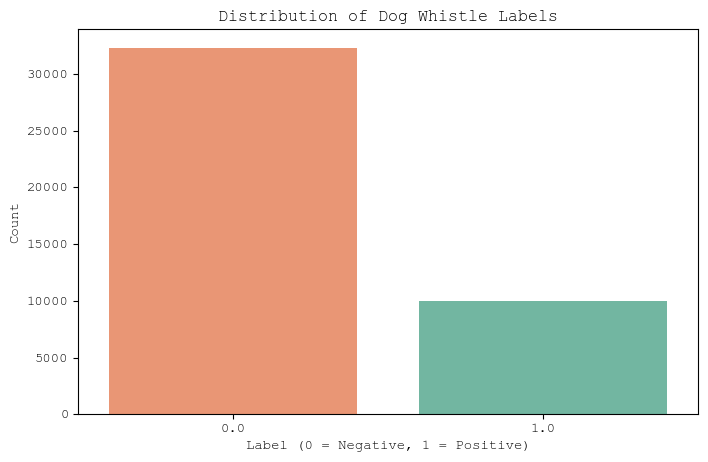

In [10]:
# Count plot for label distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='lable', data=df, palette=custom_palette)
plt.title("Distribution of Dog Whistle Labels")
plt.xlabel("Label (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.show()

In [11]:
df_pos = df[df['lable'] == 1]
df_neg = df[df['lable'] == 0]
# Count frequency of dog whistle terms in positive instances
term_counts = df_pos['dog_whistle_root'].value_counts().reset_index()
term_counts.columns = ['dog_whistle_root', 'count']
# Display the top 10 dog whistle terms
print(term_counts.head(10))

term_counts_neg = df_neg['dog_whistle_root'].value_counts().reset_index()
term_counts_neg.columns = ['dog_whistle_root', 'count']
# Display the top 10 dog whistle terms in negative instances
print(term_counts_neg.head(10))

         dog_whistle_root  count
0  social justice warrior    584
1               centipede    310
2                    cuck    306
3                 soy boy    190
4          illegal aliens    184
5               globalist    156
6       illegal immigrant    142
7           autogynephile    139
8                    beta    127
9        multiculturalism    119
                                    dog_whistle_root  count
0                                  lifelong bachelor   1975
1                                              based   1643
2                                             Google    767
3                             social justice warrior    616
4                                            blueish    590
5                                               MAGA    390
6                                         LGB rights    375
7                                      working class    372
8                                 Islamic terrorists    354
9  references to cities with large ra

In [12]:
# count number unique values in dog_whistles_root column in null dtata informal, unique number in ingroup and community
print("dataset informal unique values in dog_whistles_root column:", df["dog_whistle_root"].nunique())
print("dataset informal unique values in ingroup column:", df["ingroup"].nunique())
print("dataset informal unique values in subreddit column:", df["subreddit"].nunique())
print("Length of pos dataset informal:", len(df))
print("Length of pos dataset informal:", len(df_pos))
print("Length of neg dataset informal:", len(df_neg))
print("Start date of pos dataset informal:", df["date"].min())
print("End date of pos dataset informal:", df["date"].max())

dataset informal unique values in dog_whistles_root column: 300
dataset informal unique values in ingroup column: 18
dataset informal unique values in subreddit column: 45
Length of pos dataset informal: 42323
Length of pos dataset informal: 10021
Length of neg dataset informal: 32302
Start date of pos dataset informal: 01/01/2016
End date of pos dataset informal: 2023-09-08


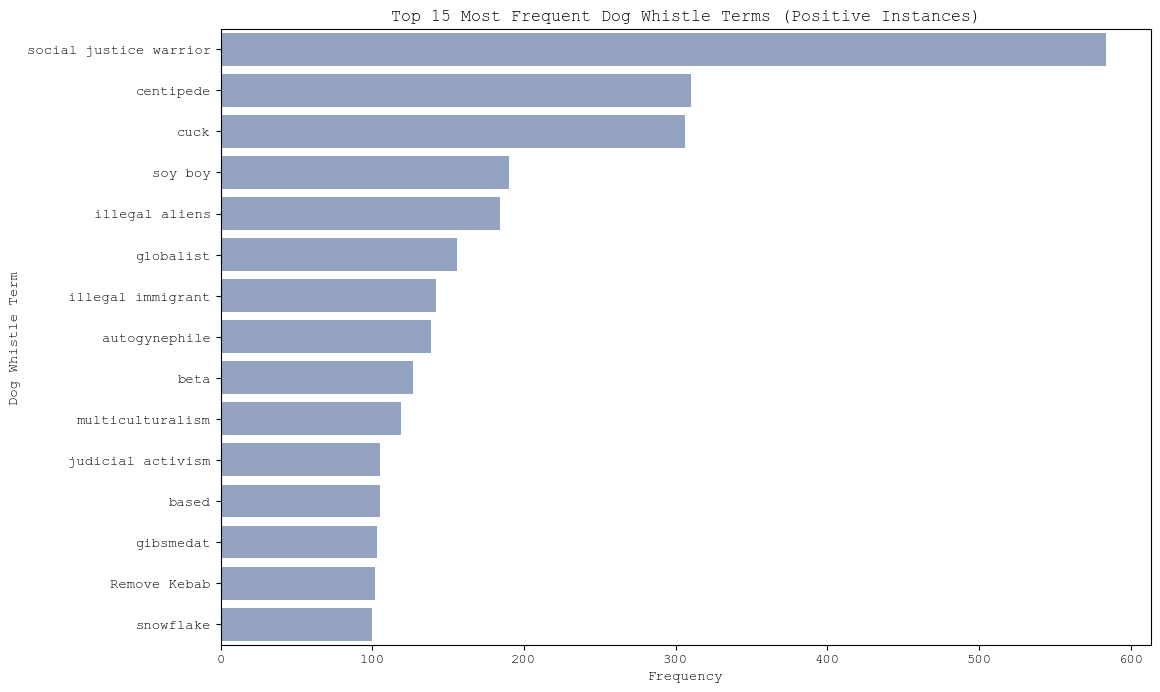

In [13]:
# Plot the top 15 dog whistle terms
plt.figure(figsize=(12, 8))
sns.barplot(data=term_counts.head(15), x='count', y='dog_whistle_root', color=custom_palette[2])
plt.title("Top 15 Most Frequent Dog Whistle Terms (Positive Instances)")
plt.xlabel("Frequency")
plt.ylabel("Dog Whistle Term")
plt.show()

In [14]:
df_neg = df[df['lable'] == 0]

# Count frequency of dog whistle terms in negative instances
term_counts = df_neg['dog_whistle'].value_counts().reset_index()
term_counts.columns = ['dog_whistle', 'count']
# Display the top 15 negative dog whistle terms
term_counts.head(15)

,dog_whistle,count
0,single,1720
1,based,1643
2,Google,691
3,blue,481
4,SJW,362
5,MAGA,320
6,LGB,297
7,the Fed,292
8,echo,235
9,working class,221


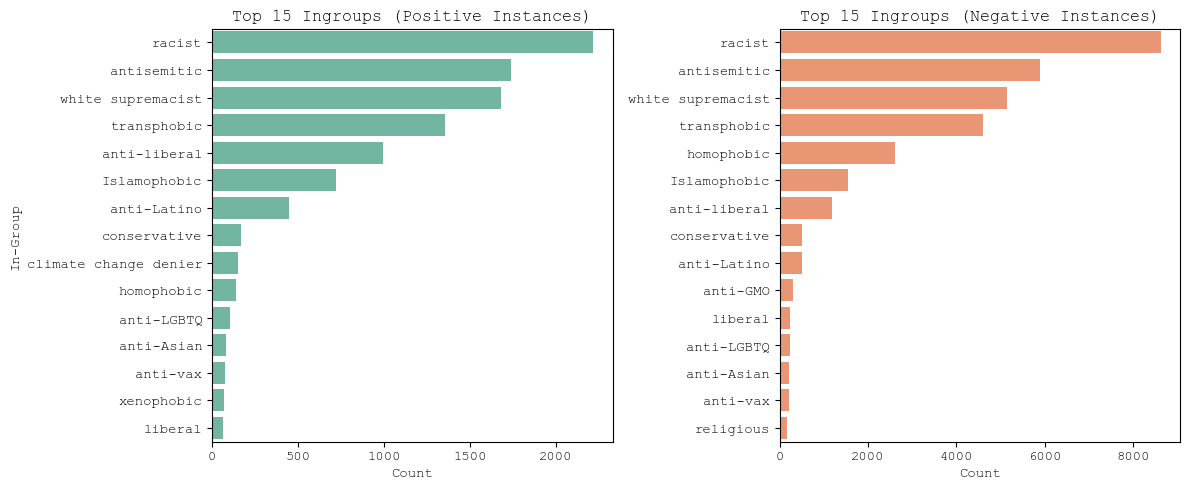

In [16]:
# Top 15 ingroups for positive and negative instances separately

# Positive instances
ingroup_counts_pos = df_pos['ingroup'].value_counts().head(15).reset_index()
ingroup_counts_pos.columns = ['ingroup', 'count']

# Negative instances
ingroup_counts_neg = df_neg['ingroup'].value_counts().head(15).reset_index()
ingroup_counts_neg.columns = ['ingroup', 'count']

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=False)

# Positive
sns.barplot(data=ingroup_counts_pos, x='count', y='ingroup', color=custom_palette[1], ax=axes[0])
axes[0].set_title("Top 15 Ingroups (Positive Instances)")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("In-Group")

# Negative
sns.barplot(data=ingroup_counts_neg, x='count', y='ingroup', color=custom_palette[0], ax=axes[1])
axes[1].set_title("Top 15 Ingroups (Negative Instances)")
axes[1].set_xlabel("Count")
axes[1].set_ylabel("")
plt.savefig('../plots/top_15_Ingroup.png', dpi=300)
plt.tight_layout()
plt.show()

Start date of dataset informal: 2008-06-03 00:00:00
End date of dataset informal: 2023-12-02 00:00:00


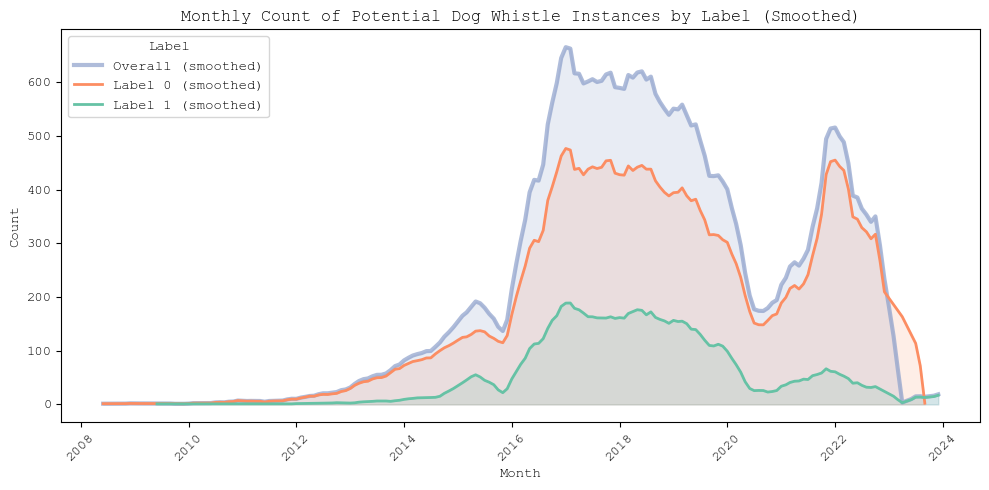

In [17]:
# Convert only label 0 dates to MM/DD/YYYY, leave others as is
mask = df['lable'] == 0
df.loc[mask, 'date'] = pd.to_datetime(df.loc[mask, 'date'], errors='coerce').dt.strftime('%m/%d/%Y')
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['month'] = df['date'].dt.to_period('M')
print("Start date of dataset informal:", df["date"].min())
print("End date of dataset informal:", df["date"].max())
# Group by month and label
monthly_counts_label = df.groupby(['month', 'lable']).size().reset_index(name='counts')
monthly_counts_label['month'] = monthly_counts_label['month'].dt.to_timestamp()

# Smooth each label's time series (same as overall)
window = 6
smoothed_label = []
for label in monthly_counts_label['lable'].unique():
    label_df = monthly_counts_label[monthly_counts_label['lable'] == label].copy()
    label_df = label_df.sort_values('month')
    label_df['smoothed'] = label_df['counts'].rolling(window=window, center=True, min_periods=1).mean()
    smoothed_label.append(label_df)
smoothed_label_df = pd.concat(smoothed_label)

# Compute overall monthly counts and rolling mean for smoothing
monthly_counts_total = df.groupby('month').size().reset_index(name='counts')
monthly_counts_total['month'] = monthly_counts_total['month'].dt.to_timestamp()
monthly_counts_total['smoothed'] = monthly_counts_total['counts'].rolling(window=window, center=True, min_periods=1).mean()

plt.figure(figsize=(10, 5))

# Plot and fill the smoothed overall distribution (behind)
plt.plot(
    monthly_counts_total['month'],
    monthly_counts_total['smoothed'],
    color=custom_palette[2],
    linewidth=3,
    alpha=0.7,
    label='Overall (smoothed)'
)
plt.fill_between(
    monthly_counts_total['month'],
    monthly_counts_total['smoothed'],
    color=custom_palette[2],
    alpha=0.2
)

# Plot and fill smoothed lines for each label
for label, color in zip([0, 1], custom_palette[:2]):
    label_df = smoothed_label_df[smoothed_label_df['lable'] == label]
    plt.plot(
        label_df['month'],
        label_df['smoothed'],
        color=color,
        label=f'Label {label} (smoothed)',
        linewidth=2,
    )
    plt.fill_between(
        label_df['month'],
        label_df['smoothed'],
        color=color,
        alpha=0.15
    )

plt.title("Monthly Count of Potential Dog Whistle Instances by Label (Smoothed)")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Label', loc='upper left')
plt.tight_layout()
plt.savefig('../plots/count_over_time_smoothed.png', bbox_inches='tight', dpi=300)
plt.show()

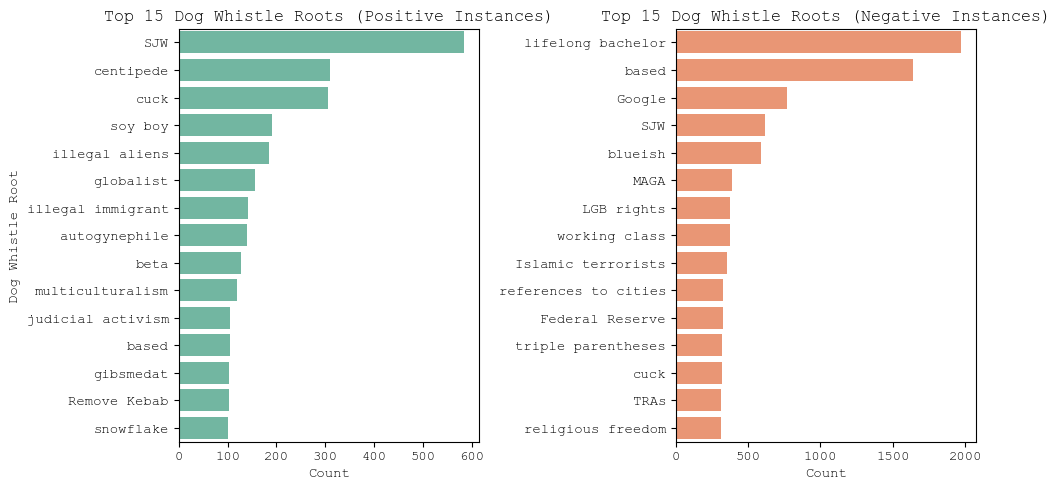

In [18]:
# Top 15 dog_whistle_root for positive and negative instances separately, cut long labels

# Positive instances
dw_counts_pos = df_pos['dog_whistle_root'].value_counts().head(15).reset_index()
dw_counts_pos.columns = ['dog_whistle_root', 'count']
dw_counts_pos['dog_whistle_root'] = dw_counts_pos['dog_whistle_root'].replace(
    {'social justice warrior': 'SJW'}
)
dw_counts_pos['dog_whistle_root'] = dw_counts_pos['dog_whistle_root'].replace(
    to_replace=r'^references to cities with large racial minority.*',
    value='references to cities',
    regex=True
)

# Negative instances
dw_counts_neg = df_neg['dog_whistle_root'].value_counts().head(15).reset_index()
dw_counts_neg.columns = ['dog_whistle_root', 'count']
dw_counts_neg['dog_whistle_root'] = dw_counts_neg['dog_whistle_root'].replace(
    {'social justice warrior': 'SJW'}
)
dw_counts_neg['dog_whistle_root'] = dw_counts_neg['dog_whistle_root'].replace(
    to_replace=r'^references to cities with large racial minority.*',
    value='references to cities',
    regex=True
)

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=False)

# Positive
sns.barplot(
    data=dw_counts_pos,
    x='count',
    y='dog_whistle_root',
    color=custom_palette[1],
    ax=axes[0]
)
axes[0].set_title("Top 15 Dog Whistle Roots (Positive Instances)")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Dog Whistle Root")

# Negative
sns.barplot(
    data=dw_counts_neg,
    x='count',
    y='dog_whistle_root',
    color=custom_palette[0],
    ax=axes[1]
)
axes[1].set_title("Top 15 Dog Whistle Roots (Negative Instances)")
axes[1].set_xlabel("Count")
axes[1].set_ylabel("")
plt.tight_layout()
plt.savefig('../plots/top_15_DW.png', bbox_inches='tight', dpi=300)
plt.show()

In [19]:
# Get unique dog_whistle_roots for each class
roots_pos = set(df_pos['dog_whistle_root'].unique())
roots_neg = set(df_neg['dog_whistle_root'].unique())

# Find overlap
overlap_roots = roots_pos & roots_neg

print(f"Number of dog_whistle_roots in positive class: {len(roots_pos)}")
print(f"Number of dog_whistle_roots in negative class: {len(roots_neg)}")
print(f"Number of dog_whistle_roots present in both classes: {len(overlap_roots)}")
print("Example overlapping roots:", list(overlap_roots)[:10])
roots_pos = set(df_pos['dog_whistle_root'].unique())
roots_neg = set(df_neg['dog_whistle_root'].unique())

overlap_roots = roots_pos & roots_neg
unique_pos = roots_pos - roots_neg
unique_neg = roots_neg - roots_pos

print(f"Number of dog_whistle_roots in both classes: {len(overlap_roots)}")
print(f"Number unique to positive class: {len(unique_pos)}")
print(f"Number unique to negative class: {len(unique_neg)}")

Number of dog_whistle_roots in positive class: 294
Number of dog_whistle_roots in negative class: 299
Number of dog_whistle_roots present in both classes: 293
Example overlapping roots: ['entitlement programs', 'thug', 'male-friendly content', '41%', 'beta', 'A Leppo', 'MAGA', 'colorblind', 'Trilateral Commission', 'balance the budget']
Number of dog_whistle_roots in both classes: 293
Number unique to positive class: 1
Number unique to negative class: 6


/var/folders/vx/1wqkklmd4qzbv02gbc6344wc0000gn/T/ipykernel_24348/1101445433.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subreddit_counts.head(15), x='count', y='subreddit', palette=custom_palette)
/var/folders/vx/1wqkklmd4qzbv02gbc6344wc0000gn/T/ipykernel_24348/1101445433.py:5: UserWarning: 
The palette list has fewer values (3) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=subreddit_counts.head(15), x='count', y='subreddit', palette=custom_palette)


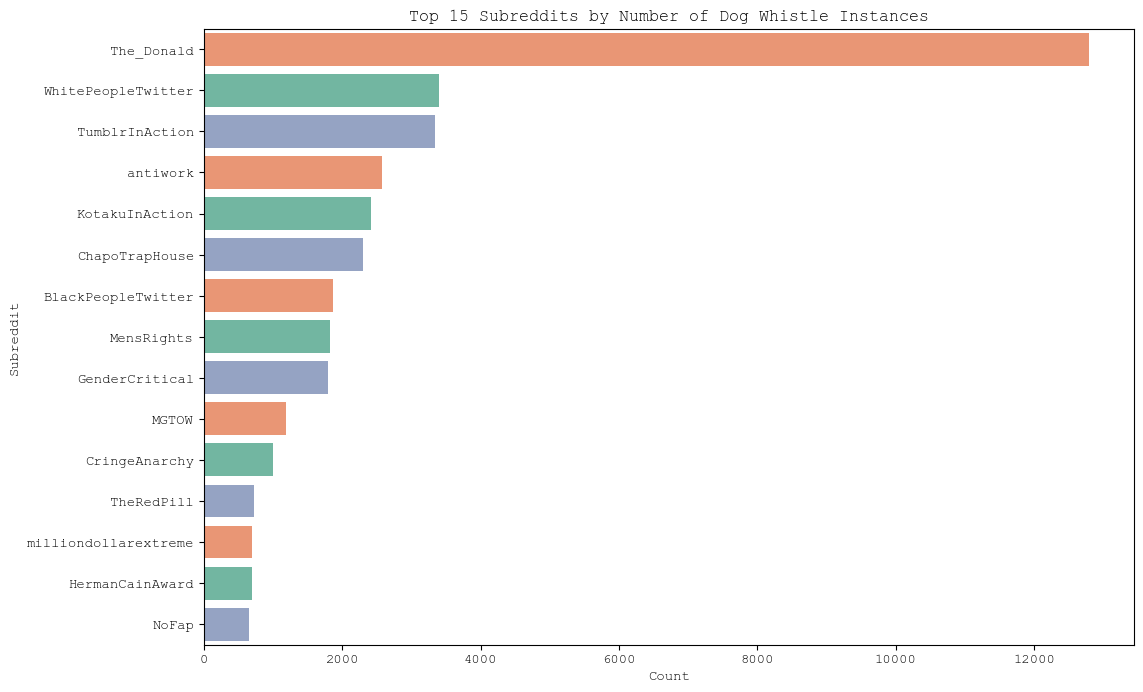

In [25]:
subreddit_counts = df['subreddit'].value_counts().reset_index()
subreddit_counts.columns = ['subreddit', 'count']

plt.figure(figsize=(12, 8))
sns.barplot(data=subreddit_counts.head(15), x='count', y='subreddit', palette=custom_palette)
plt.title("Top 15 Subreddits by Number of Dog Whistle Instances")
plt.xlabel("Count")
plt.ylabel("Subreddit")
plt.show()


--- Crosstab: Top 10 Subreddits vs. Top 10 Ingroups ---
ingroup               Islamophobic  anti-LGBTQ  anti-Latino  anti-liberal  \
subreddit                                                                   
ChapoTrapHouse                 107           1           11            55   
CoonTown                        15           1            2            13   
CringeAnarchy                   58           2           12            47   
GenderCritical                  14           9            1            10   
KotakuInAction                 151          14           18           453   
MGTOW                           29           2            3            50   
The_Donald                    1100          25          743           546   
TumblrInAction                 111          26           14           487   
WhitePeopleTwitter             202         128           47            46   
milliondollarextreme            23           0            3            89   

ingroup           

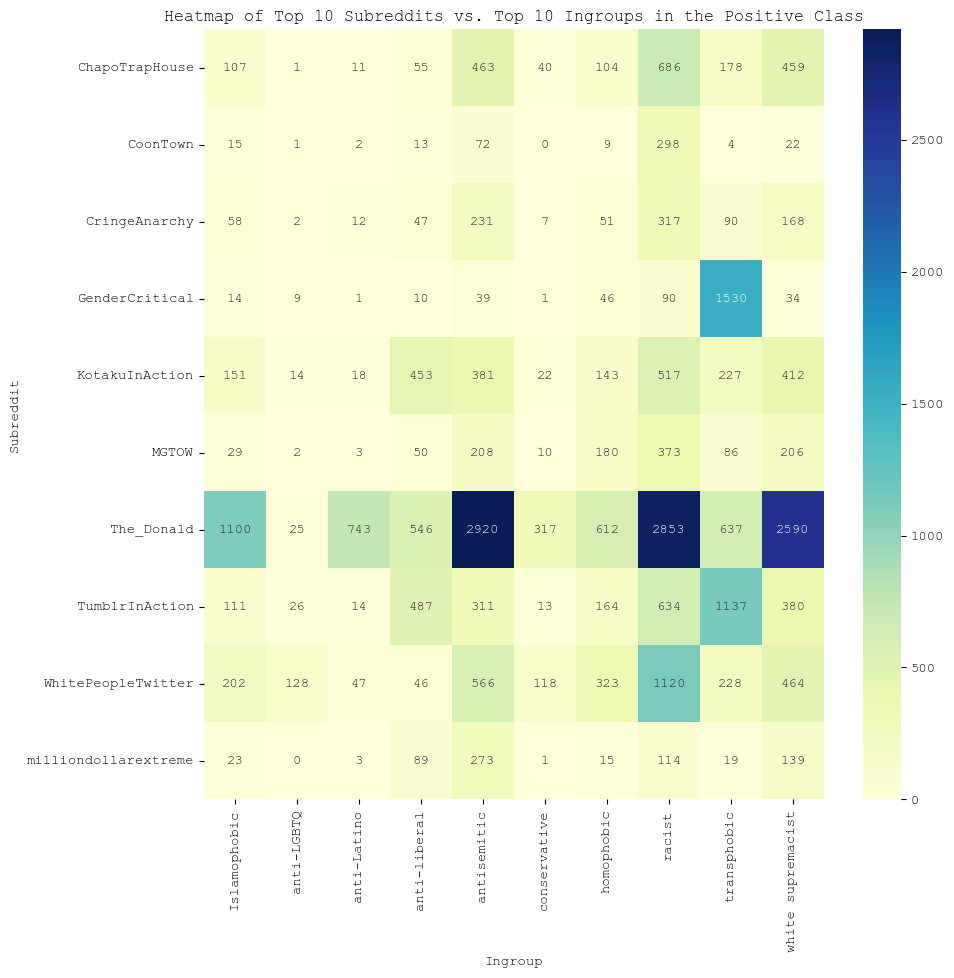


--- Temporal Trends for Top 10 Dog Whistles: ['social justice warrior', 'centipede', 'cuck', 'soy boy', 'illegal aliens', 'globalist', 'illegal immigrant', 'autogynephile', 'beta', 'multiculturalism'] ---


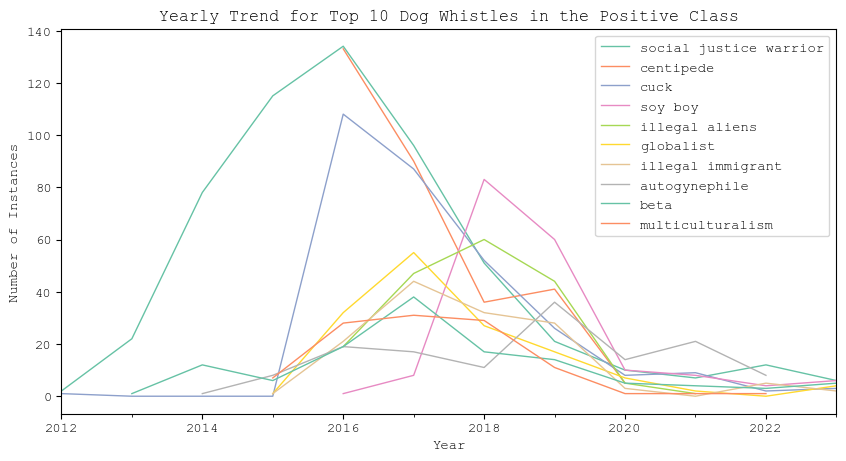

In [32]:
# Subreddit vs. Ingroup (Heatmap or Crosstab)
print("\n--- Crosstab: Top 10 Subreddits vs. Top 10 Ingroups ---")
top_10_subs = df_pos['subreddit'].value_counts().nlargest(10).index
top_10_ingroups = df['ingroup'].value_counts().nlargest(10).index
sub_ingroup_crosstab = pd.crosstab(
    df[df['subreddit'].isin(top_10_subs)]['subreddit'],
    df[df['ingroup'].isin(top_10_ingroups)]['ingroup'],
)
print(sub_ingroup_crosstab)

plt.figure(figsize=(10, 10))
sns.heatmap(sub_ingroup_crosstab, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title('Heatmap of Top 10 Subreddits vs. Top 10 Ingroups in the Positive Class')
plt.xlabel('Ingroup')
plt.ylabel('Subreddit')
plt.savefig('../plots/trend_top_DW.png', bbox_inches='tight', dpi=300)
plt.show()

# Temporal Trends for Specific Dog Whistles
top_10_dw = df_pos['dog_whistle_root'].value_counts().nlargest(10).index
print(f"\n--- Temporal Trends for Top 10 Dog Whistles: {list(top_10_dw)} ---")
plt.figure(figsize=(10, 5))
colors = sns.color_palette("Set2", n_colors=len(top_10_dw))  # or use your custom_palette if only 3 lines
for i, dw in enumerate(top_10_dw):
    dw_trend = df_pos[df_pos['dog_whistle_root'] == dw].set_index('date').resample('YE').size()
    dw_trend.plot(label=dw, color=colors[i], linewidth=1)
plt.title('Yearly Trend for Top 10 Dog Whistles in the Positive Class')
plt.xlabel('Year')
plt.ylabel('Number of Instances')
plt.legend()
plt.savefig('../plots/trend_top_DW.png', bbox_inches='tight', dpi=300)
plt.show()